In [2]:
import polars as pl
import rdkit.Chem as Chem

In [3]:
# Read test data using polars
data_path = "../data/raw/test.parquet"
data = pl.read_parquet(data_path)

In [4]:
data.head()

id,buildingblock1_smiles,buildingblock2_smiles,buildingblock3_smiles,molecule_smiles,protein_name
i64,str,str,str,str,str
295246830,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246831,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""
295246832,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""C=Cc1ccc(N)cc1""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""sEH"""
295246833,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""BRD4"""
295246834,"""C#CCCC[C@H](NC(=O)OCC1c2ccccc2…","""C=Cc1ccc(N)cc1""","""CC(O)Cn1cnc2c(N)ncnc21""","""C#CCCC[C@H](Nc1nc(Nc2ccc(C=C)c…","""HSA"""


In [5]:
data = data.to_pandas()

In [6]:
# Take rows with unique values in buildingblock1_smiles
unique_buildingblock1 = data.drop_duplicates(subset=["buildingblock1_smiles"])

# To create a product from the building blocks
Train set
1. FMOC reacts with triazine core
2. NH2 or NH groups react with triazine core

Test set
1. Boronate on bb reacts with Halide
2. COOH on bb reacts with FMOC
3. DNA reacts with NH

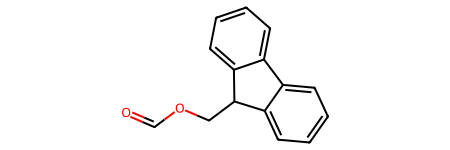

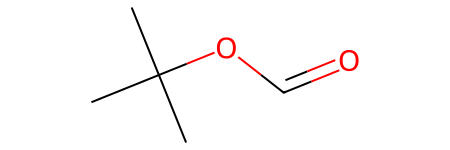

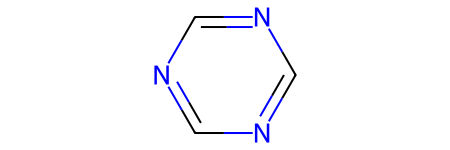

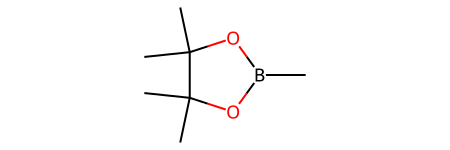

In [7]:
FMOC_SMILE = "O=COCC1c2ccccc2-c2ccccc21"
BOC_SMILE = "C(=O)OC(C)(C)C"
TRIAZINE_SMILE = "c1ncncn1"
BORONATE = "CB1OC(C)(C)C(C)(C)O1"

# Show fmoc and boc
FMOC = Chem.MolFromSmiles(FMOC_SMILE)
BOC = Chem.MolFromSmiles(BOC_SMILE)
TRIAZINE = Chem.MolFromSmiles(TRIAZINE_SMILE)
BORONATE = Chem.MolFromSmiles(BORONATE)
display(FMOC)
display(BOC)
display(TRIAZINE)
display(BORONATE)

In [23]:
FMOC_TRIAZINE_SMART = '[*:1]C(=O)OCC1c2ccccc2-c2ccccc21>>c1nc([*:1])ncn1'
reaction_fmoc_triazine = Chem.rdChemReactions.ReactionFromSmarts(FMOC_TRIAZINE_SMART)
NH2_TRIAZINE_SMART1 = '[cH:1]1nc([*:3])ncn1.[NH2;!$(N-[#66]):2]>>[c:1]([*:3])1ncnc([NH:2])n1' 
reaction_nh2_triazine1 = Chem.rdChemReactions.ReactionFromSmarts(NH2_TRIAZINE_SMART1)
NH_TRIAZINE_SMART1 = '[cH:1]1nc([*:3])ncn1.[Nh;!$(N-[#66]):2]>>[c:1]([*:3])1ncnc([N:2])n1' 
reaction_nh_triazine1 = Chem.rdChemReactions.ReactionFromSmarts(NH_TRIAZINE_SMART1)
NH2_TRIAZINE_SMART2 = '[cH:1]1nc([*:3])nc([*:4])n1.[NH2;!$(N-[#66]):2]>>[c:1]([*:3])1nc([*:4])nc([NH:2])n1'
reaction_nh2_triazine2 = Chem.rdChemReactions.ReactionFromSmarts(NH2_TRIAZINE_SMART2)
NH_TRIAZINE_SMART2 = '[cH:1]1nc([*:3])nc([*:4])n1.[Nh;!$(N-[#66]):2]>>[c:1]([*:3])1nc([*:4])nc([N:2])n1'
reaction_nh_triazine2 = Chem.rdChemReactions.ReactionFromSmarts(NH_TRIAZINE_SMART2)

BORONATE_HALIDE_SMART = '[*:1]([I,Br,Cl,F]).[*:2]B1OC(C)(C)C(C)(C)O1>>[*:1]([*:2])'
reaction_boronate_halide = Chem.rdChemReactions.ReactionFromSmarts(BORONATE_HALIDE_SMART)
COOH_BOC_SMART = '[*:1]C(=O)OC(C)(C)C.[*:2]C(=O)O>>[*:1]C(=O)[*:2]'
reaction_cooh_boc = Chem.rdChemReactions.ReactionFromSmarts(COOH_BOC_SMART)
COOH_FMOC_SMART = '[*:1]C(=O)OCC1c2ccccc2-c2ccccc21.[*:2]C(=O)O>>[*:1]C(=O)[*:2]'
reaction_cooh_fmoc = Chem.rdChemReactions.ReactionFromSmarts(COOH_FMOC_SMART)

#DNA_COOH_SMART = 'C' # Always on the first bb
#reaction_dna_cooh = Chem.rdChemReactions.ReactionFromSmarts(DNA_COOH_SMART)

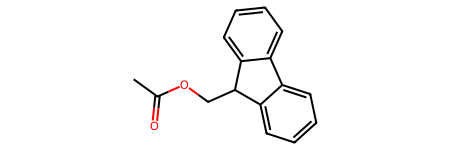

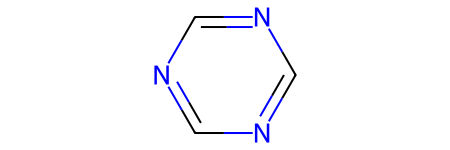

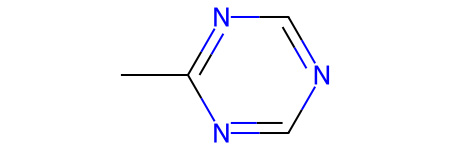

In [9]:
test1 = Chem.MolFromSmiles("CC(=O)OCC1c2ccccc2-c2ccccc21")
test2 = Chem.MolFromSmiles(TRIAZINE_SMILE)

# Check if smart matches to test1

display(test1)
display(test2)
#reaction = reaction_nh2_triazine
product = reaction_fmoc_triazine.RunReactants([test1])

# print(reaction_boronate_halide.IsMoleculeReactant(test1))
# print(reaction_boronate_halide.IsMoleculeReactant(test2))

display(product[0][0])

In [10]:
def sanitize_molecule(mol):
    try:
        Chem.SanitizeMol(mol)
    except Chem.MolSanitizeException as e:
        raise ValueError(f"Sanitization failed: {e}")

In [14]:
def has_halogen_group(mol) -> bool:
    halogen = Chem.MolFromSmarts("[I,Br,Cl,F]")
    return mol.HasSubstructMatch(halogen)

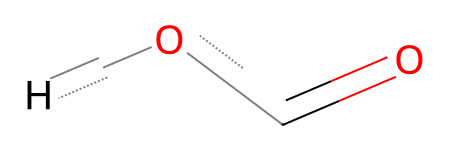

In [98]:
# Substruct COOH can't include ester
Chem.MolFromSmarts("C(=O)O[H]")

In [101]:
def create_product(bb1: str, bb2: str, bb3: str) -> Chem.Mol:
    BB1 = Chem.MolFromSmiles(bb1)
    BB2 = Chem.MolFromSmiles(bb2)
    BB3 = Chem.MolFromSmiles(bb3)

    # If BB1 has FMOC, do FMOC triazine reaction
    result = BB1
    bb1_fmoc_substruct_match = BB1.HasSubstructMatch(FMOC)
    bb2_boronate_substruct_match = BB2.HasSubstructMatch(BORONATE)
    bb3_coo_substruct_match = BB3.HasSubstructMatch(Chem.MolFromSmarts('C(=O)O[H]'))
    # print(f"BB1 FMOC substruct match: {bb1_fmoc_substruct_match}")
    # print(f"BB2 boronate substruct match: {bb2_boronate_substruct_match}")
    # print(f"BB3 COO substruct match: {bb3_coo_substruct_match}")
    if bb1_fmoc_substruct_match and not (bb2_boronate_substruct_match and bb3_coo_substruct_match):
        # Use FMOC_TRIAZINE_SMART to replace FMOC with triazine
        products = reaction_fmoc_triazine.RunReactants([BB1]) 
        if len(products) == 0:
            raise ValueError("No products were generated from fmoc triazine reaction")
        result = products[0][0]
        sanitize_molecule(result)

    # Add DNA to the product using replace substructs COOH becomes CONHDy
    if result.HasSubstructMatch(Chem.MolFromSmiles('CC(=O)O')):
        # Replace substructs COOH with CONHDy
        result = Chem.ReplaceSubstructs(result, Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('CC(=O)N[Dy]'))[0]
        sanitize_molecule(result)
    # If there is a triazine in the product, do NH2 triazine reaction
    sanitize_molecule(result) 
    if result.HasSubstructMatch(TRIAZINE):
        # Use NH2_TRIAZINE_SMART1 to replace triazine with NH2 for BB2
        products = reaction_nh2_triazine1.RunReactants((result, BB2))
        if len(products) == 0:
            raise ValueError("No products were generated from nh2 triazine reaction")
        result = products[0][0]
        sanitize_molecule(result) 
        # Use NH2_TRIAZINE_SMART2 to replace triazine with NH2 for BB3
        products = reaction_nh2_triazine2.RunReactants((result, BB3))
        if len(products) == 0:
            raise ValueError("No products were generated from nh2 triazine reaction")
        result = products[0][0]
        sanitize_molecule(result)
    elif has_halogen_group(result):
        # Use BORONATE_HALIDE_SMART to replace boronate with halide
        products = reaction_boronate_halide.RunReactants([result, BB2]) 
        if len(products) == 0:
            raise ValueError("No products were generated from boronate halide reaction")
        result = products[0][0]
        sanitize_molecule(result)

        # Use COOH_BOC_SMART to replace BOC with COOH
        if result.HasSubstructMatch(FMOC):
            products = reaction_cooh_fmoc.RunReactants([result, BB3])
            if len(products) == 0:
                raise ValueError("No products were generated from cooh fmoc reaction")
            result = products[0][0]
        else:
            products = reaction_cooh_boc.RunReactants([result, BB3])
            if len(products) == 0:
                raise ValueError("No products were generated from cooh boc reaction")
            result = products[0][0]
        sanitize_molecule(result)
    else:
        display(BB1)
        display(BB2)
        display(BB3)
        raise ValueError("Molecule does not contain triazine or halogen group")
    


    return result 

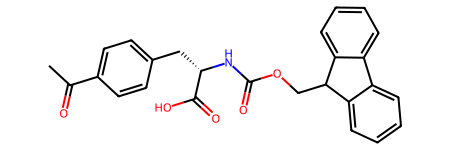

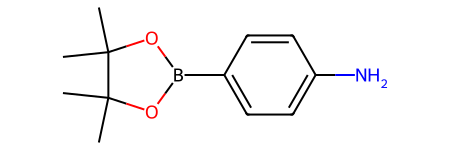

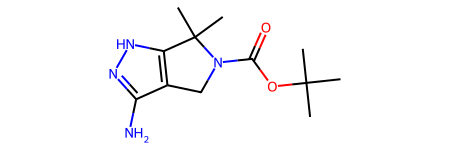

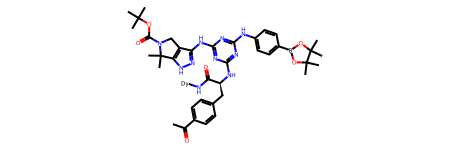

In [102]:
# Special row
spec_row = unique_buildingblock1.iloc[49]
spec_row = data.iloc[58598]

# Display the row buildingblock1_smiles, buildingblock2_smiles, buildingblock3_smiles, and the molecule_smiles
spec_row_mol = [Chem.MolFromSmiles(spec_row["buildingblock1_smiles"]), Chem.MolFromSmiles(spec_row["buildingblock2_smiles"]), Chem.MolFromSmiles(spec_row["buildingblock3_smiles"])]
display(spec_row_mol[0])
display(spec_row_mol[1])
display(spec_row_mol[2])
display(Chem.MolFromSmiles(spec_row["molecule_smiles"]))

# Create product
product = create_product(spec_row["buildingblock1_smiles"], spec_row["buildingblock2_smiles"], spec_row["buildingblock3_smiles"])

In [103]:
# Draw the buildingblock1_smiles, buildingblock2_smiles, buildingblock3_smiles and molecule_smiles columns

# Draw rows with step 3
rows = unique_buildingblock1.iloc[0:1000]
rows = data.iloc[0:100000]
# rows = rows[::3]

# Draw the rows in a grid
grid = []
count = 0
for i, row in rows.iterrows():
    try:
        result = create_product(row["buildingblock1_smiles"], row["buildingblock2_smiles"], row["buildingblock3_smiles"])
        count += 1
    except ValueError as e:
        raise ValueError(f"Reaction failed: {e} at count {count}")

    # Check if the result is the same as the molecule_smiles
    if not result.HasSubstructMatch(Chem.MolFromSmiles(row["molecule_smiles"])):
        grid.append([Chem.MolFromSmiles(row["buildingblock1_smiles"]),
                     Chem.MolFromSmiles(row["buildingblock2_smiles"]),
                     Chem.MolFromSmiles(row["buildingblock3_smiles"]),
                     result,
                     Chem.MolFromSmiles(row["molecule_smiles"])])
        print(f"Count {count} failed")

    # grid.append([Chem.MolFromSmiles(row["buildingblock1_smiles"]),
    #                                        Chem.MolFromSmiles(row["buildingblock2_smiles"]),
    #                                        Chem.MolFromSmiles(row["buildingblock3_smiles"]),
    #                                        result,
    #                                        Chem.MolFromSmiles(row["molecule_smiles"])]),

# If result == molecule_smiles, the reaction is correct
# If result != molecule_smiles, the reaction is incorrect
# If result == None, the reaction failed
# Draw the molecules in a grid giving the smiles as labels, color the molecule in red if the reaction failed
if len(grid) == 0:
    print("All reactions generated the correct molecule")
else:
    img = Chem.Draw.MolsToGridImage([mol for row in grid for mol in row], 
                                 molsPerRow=5, maxMols=500, subImgSize=(300, 300)) 
    display(img)

ValueError: Reaction failed: No products were generated from boronate halide reaction at count 58598